In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

import codecs



In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

In [3]:
df.country_txt.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: country_txt, dtype: int64

In [58]:
df.shape

(181691, 135)

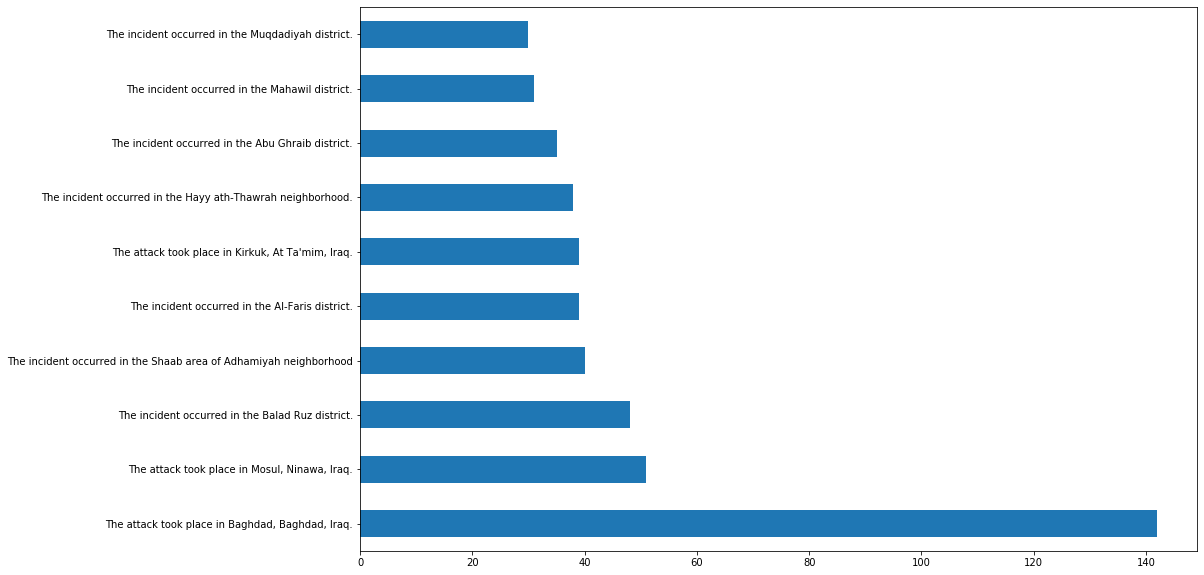

In [4]:
df[df['country_txt'] == 'Iraq']['location'].value_counts()[:10].plot(y= 'location',x = 'attacks',kind = 'barh',figsize = (15,10))

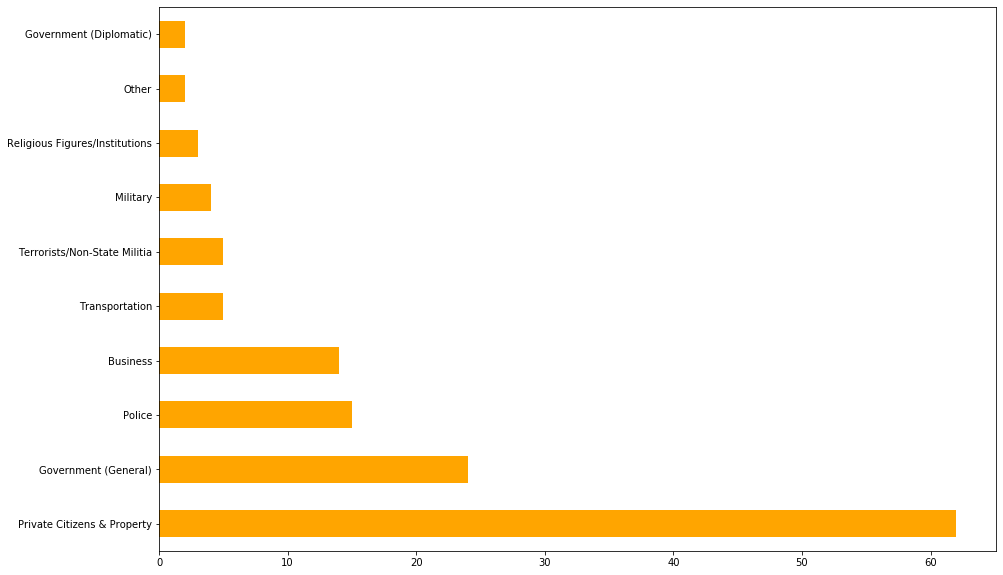

In [5]:
df[df['location'] == 'The attack took place in Baghdad, Baghdad, Iraq.']['targtype1_txt'].value_counts()[:10].plot(x = 'targets',y = 'attacks',kind = 'barh',figsize = (15,10),color ='orange')

In [6]:
df[df['location'] == 'The attack took place in Baghdad, Baghdad, Iraq.']['motive'].value_counts()[:10]#.plot(kind = 'barh',figsize = (15,10))

The specific motive for the attack is unknown.                           141
The specific motive for the attack was to prevent people from voting.      1
Name: motive, dtype: int64

In [7]:
df[df['country_txt'] == 'Iraq']['motive'].value_counts()[:10]#.plot(kind = 'barh',figsize = (15,10))

The specific motive for the attack is unknown.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      3784
Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

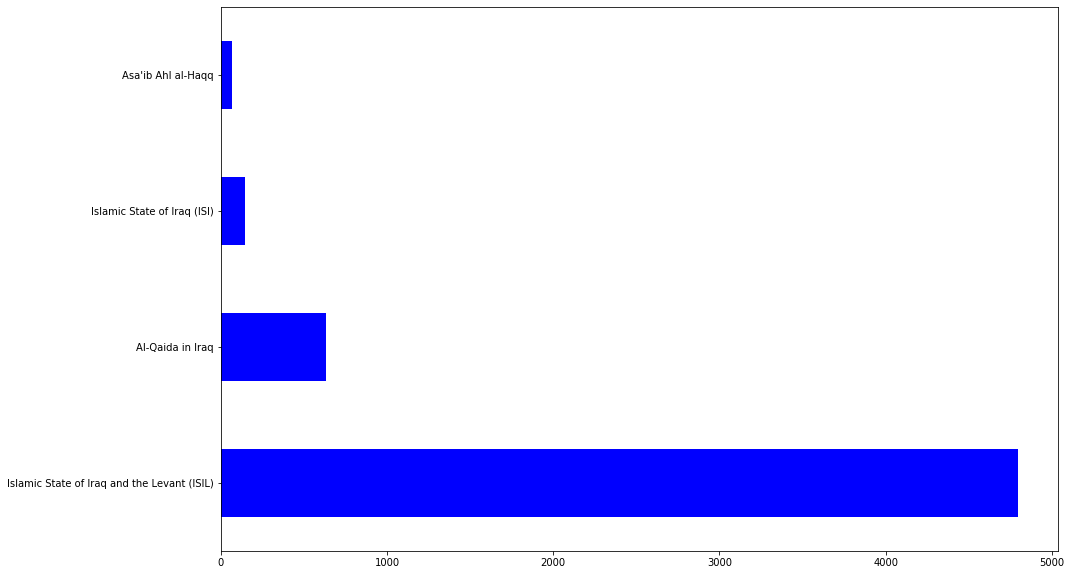

In [8]:
df[df['country_txt'] == 'Iraq']['gname'].value_counts()[1:5].plot(kind = 'barh',figsize = (15,10),color = 'blue')
# top group names in country

In [9]:
df[df['gname'] == 'Islamic State of Iraq and the Levant (ISIL)']['motive'].value_counts()[:4]

The specific motive is unknown; however, sources noted that the victims were attempting to leave the area at the time of the attack.                                                                                                                                                                                                                                                                    25
According to an online statement, Islamic State of Iraq and the Levant (ISIL) claimed responsibility for the incident, stating that the attack was in retaliation for the Iraqi government's alleged "crimes" against the minority Sunni community. Moreover, the armed Islamist outfit claims that the incident was part of its newly launched offensive campaign called "Harvesting the Soldiers".    23
In a statement posted online, Islamic State of Iraq and the Levant (ISIL) claimed responsibility and stated that the attacks were in response to Iraqi security forces arresting hundreds of Muslims.             

In [59]:
motive_iraq = df[df['gname'] == 'Al-Qaida in Iraq']['motive'].value_counts()[:10]

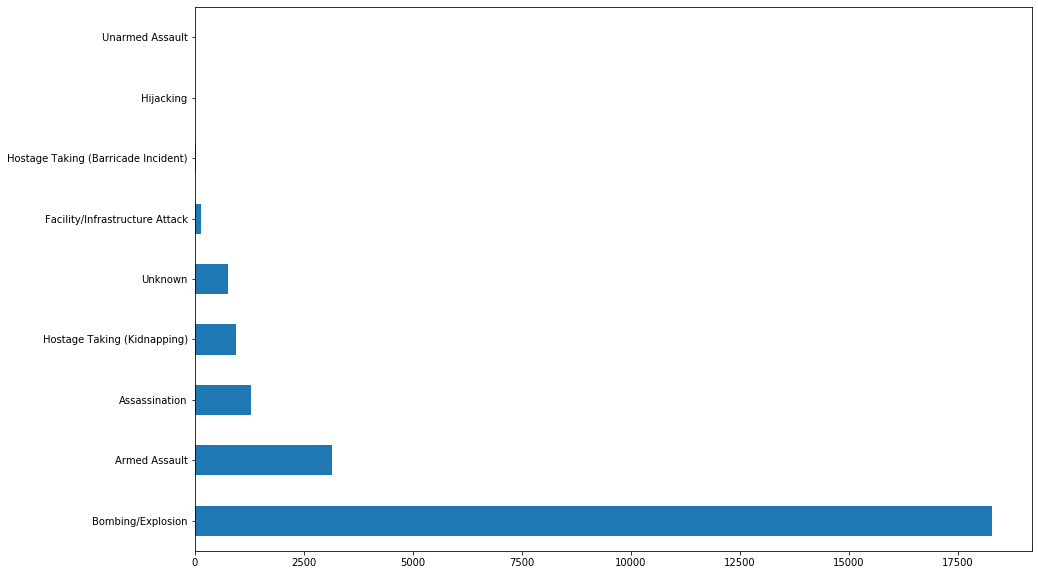

In [11]:
df[df['country_txt'] == 'Iraq']['attacktype1_txt'].value_counts()[:10].plot(kind = 'barh',figsize = (15,10))

In [12]:
df[df['country_txt'] == 'Iraq']['multiple'].value_counts()[:10]

0.0    20864
1.0     3772
Name: multiple, dtype: int64

In [13]:
df[(df['country_txt'] == 'Iraq') & (df['multiple'] == 1)]['motive'].value_counts()[2:10]#.plot(kind = 'barh',figsize = (15,10))

The specific motive is unknown; however, sources suspected that the attack, which targeted members of the Sunni community, may have been part of a larger trend of sectarian violence between Iraq's minority Sunni and majority Shiite communities.                                                                                                                                                                                                                                                                                51
The specific motive is unknown; however, Al-Qa'ida in Iraq (AQI) claimed responsibility in an online statement, saying that the attack was part of a larger pattern of violence targeting government and security forces in "response to the campaign of detaining, torture, embargo and confiscation of lands of Sunni people, especially in Baghdad and its outskirts."  Sources speculated that the attack may be part of a larger trend of sectarian violence between Iraq's minority Sunni a

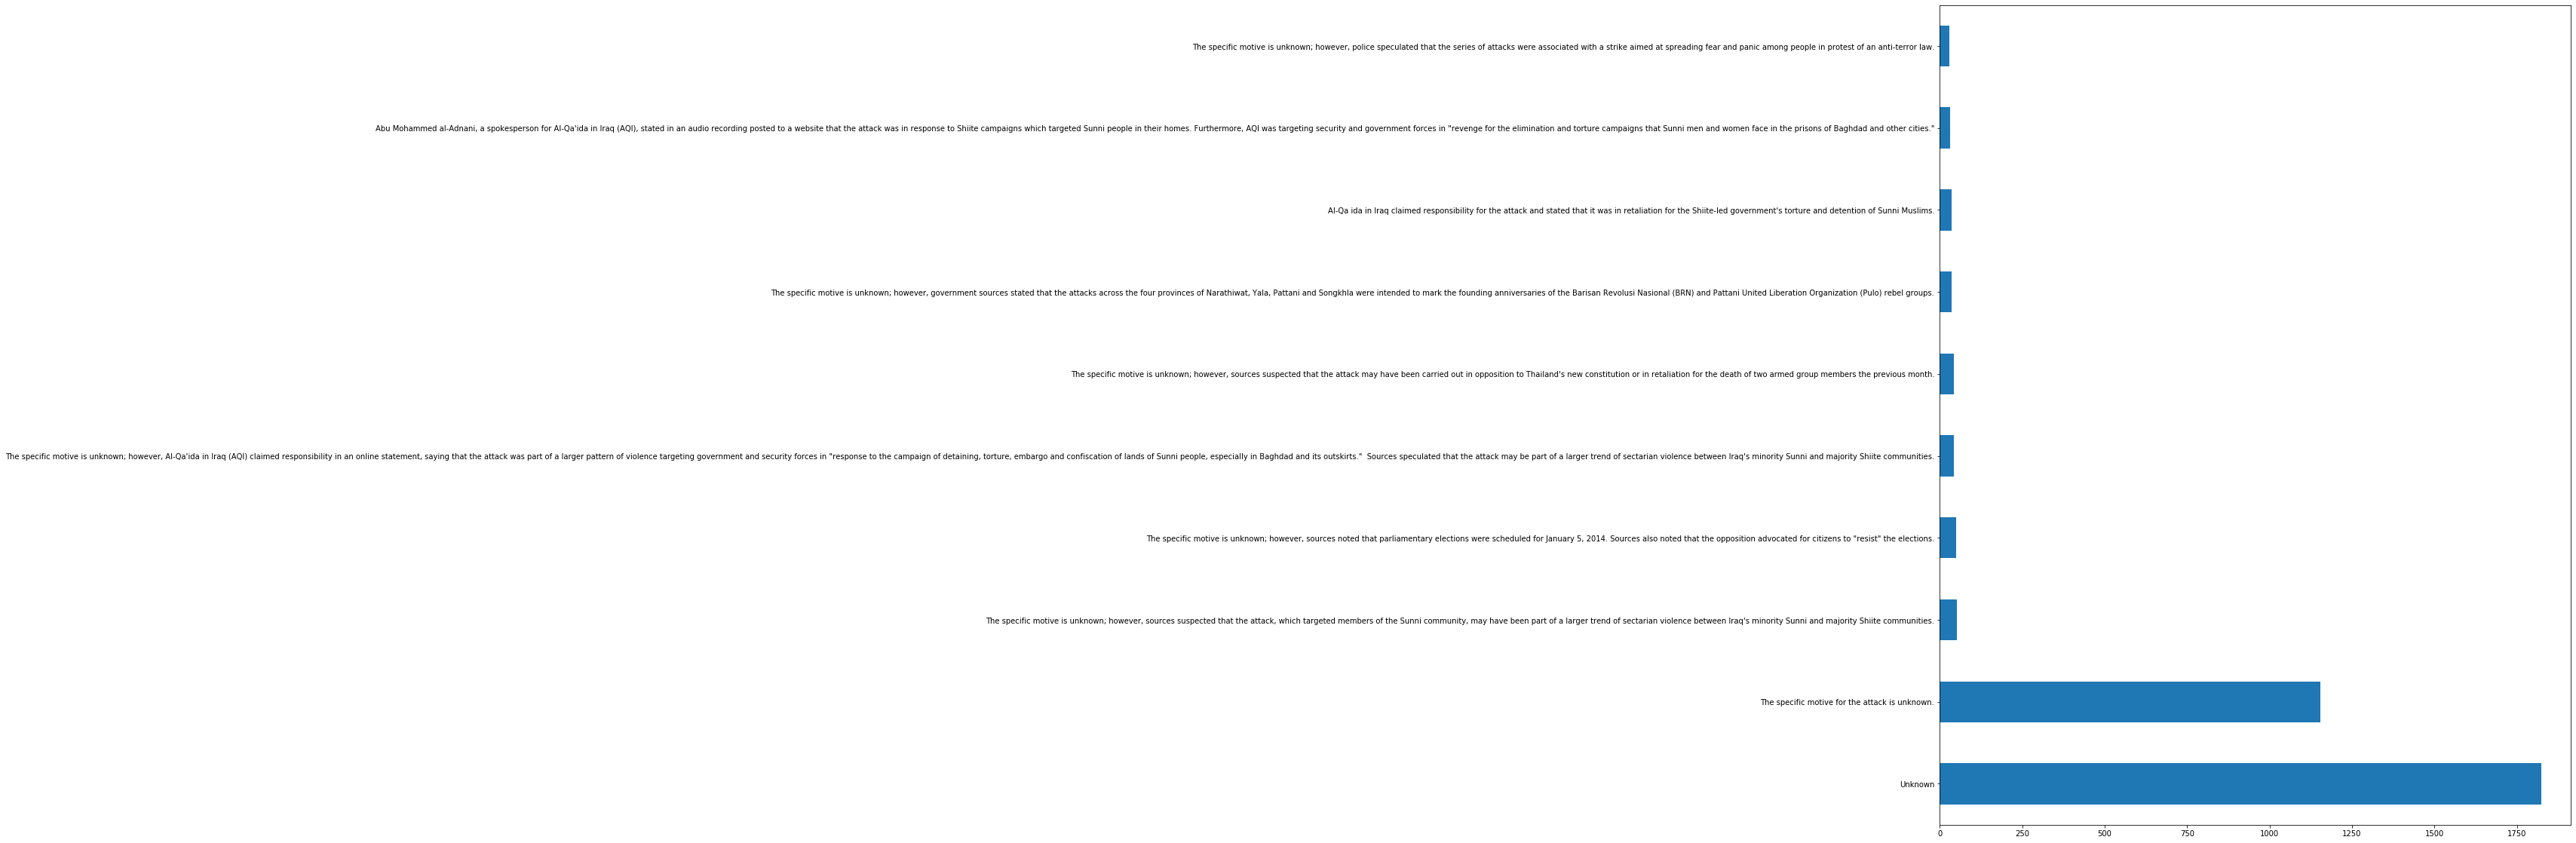

In [14]:
df[df['multiple'] == 1]['motive'].value_counts()[:10].plot(kind = 'barh',figsize = (15,20))

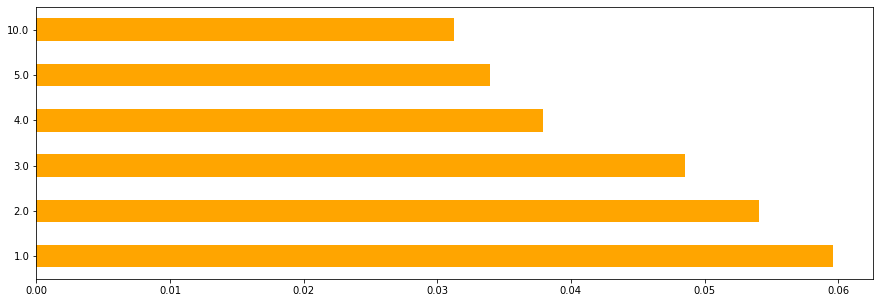

In [15]:
((df[(df['country_txt'] == 'Iraq') & (df['multiple'] == 1)]['nwound'].value_counts()[1:10])/len(df[(df['country_txt'] == 'Iraq') & (df['multiple'] == 1)])).plot(kind = 'barh',figsize = (15,5),color = 'orange')
# when multiple is 1 nwound

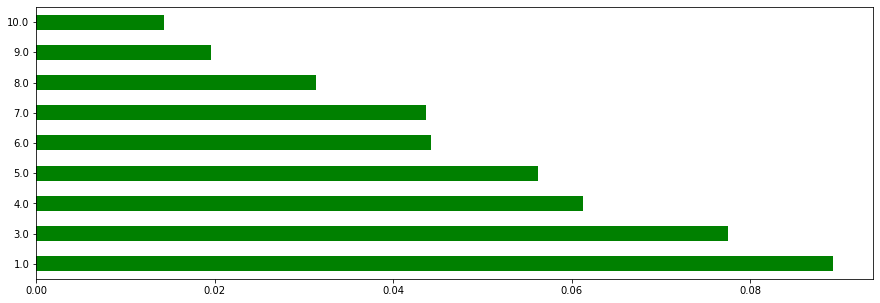

In [16]:
(df[(df['country_txt'] == 'Iraq') & (df['multiple'] == 0)]['nwound'].value_counts()[1:10]/len(df[(df['country_txt'] == 'Iraq') & (df['multiple'] == 0)])).plot(kind = 'barh',figsize = (15,5),color = 'green')
# when multiple is 0 nwound

In [17]:
df[(df['country_txt'] == 'Iraq') & (df['multiple'] == 0)]['weaptype1_txt'].value_counts()[1:10]/len(df[(df['country_txt'] == 'Iraq') & (df['multiple'] == 0)])

Firearms                                                                       0.190184
Unknown                                                                        0.045245
Melee                                                                          0.003307
Incendiary                                                                     0.002732
Chemical                                                                       0.001773
Other                                                                          0.000383
Sabotage Equipment                                                             0.000096
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)    0.000096
Name: weaptype1_txt, dtype: float64

In [18]:
df[(df['country_txt'] == 'Iraq') & (df['multiple'] == 1)]['weaptype1_txt'].value_counts()[1:10]/len(df[(df['country_txt'] == 'Iraq') & (df['multiple'] == 1)])

Unknown       0.074496
Firearms      0.069459
Incendiary    0.018028
Chemical      0.002651
Melee         0.000530
Other         0.000265
Name: weaptype1_txt, dtype: float64

In [19]:
print('Country with Highest Terrorist Attacks:',df['country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['region'].value_counts().index[0])


Country with Highest Terrorist Attacks: 95
Regions with Highest Terrorist Attacks: 10


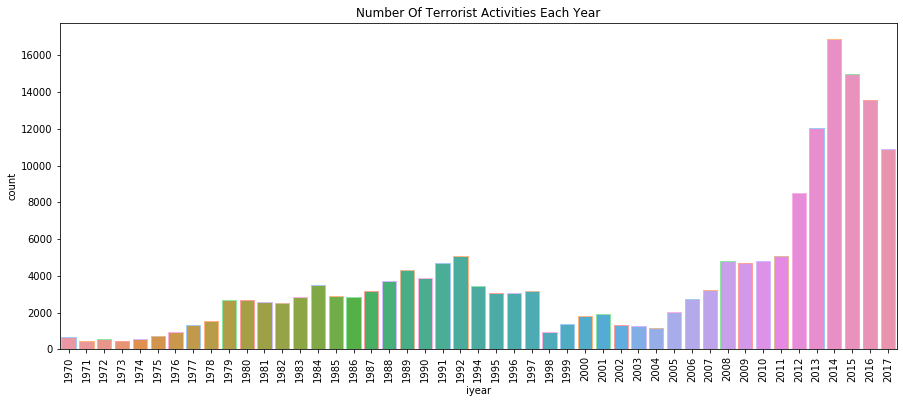

In [20]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=df,edgecolor=sns.color_palette('pastel',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

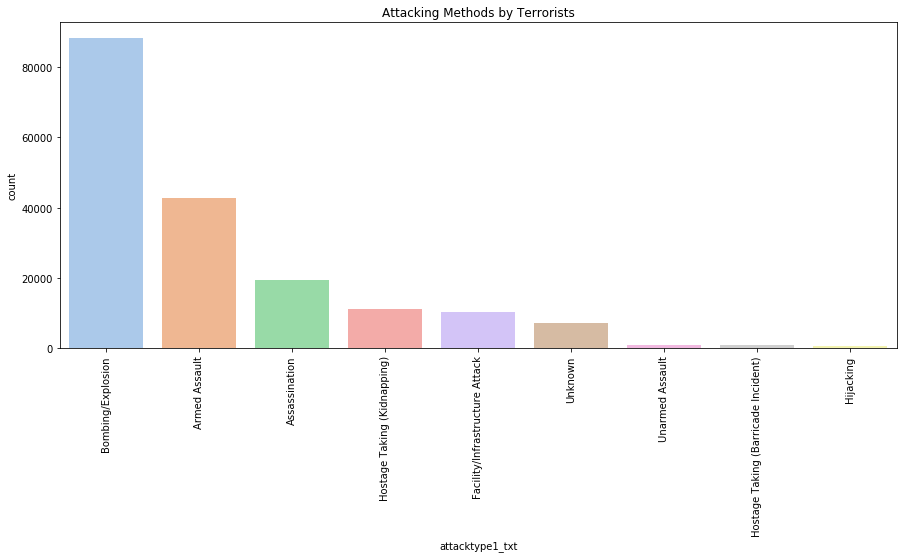

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=df,palette='pastel',order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

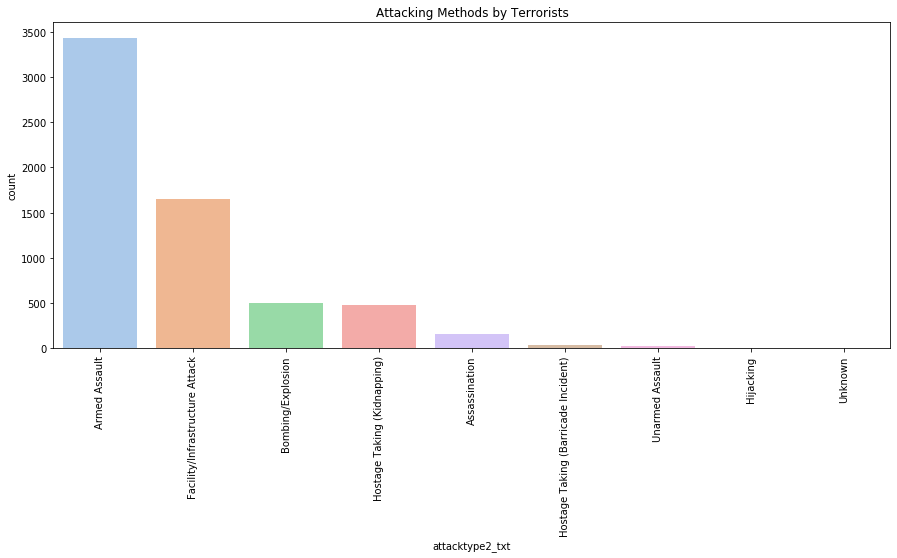

In [22]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype2_txt',data=df,palette='pastel',order=df['attacktype2_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

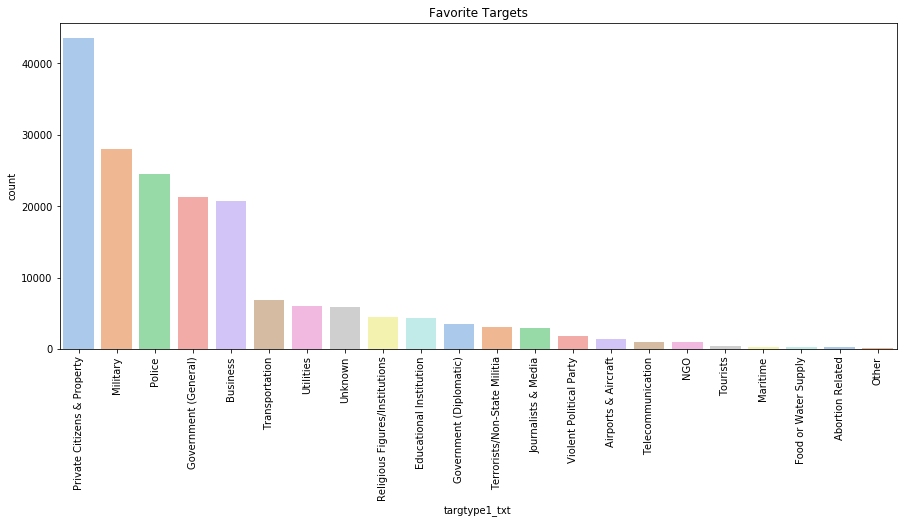

In [23]:
plt.subplots(figsize=(15,6))
sns.countplot(df['targtype1_txt'],palette='pastel',order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

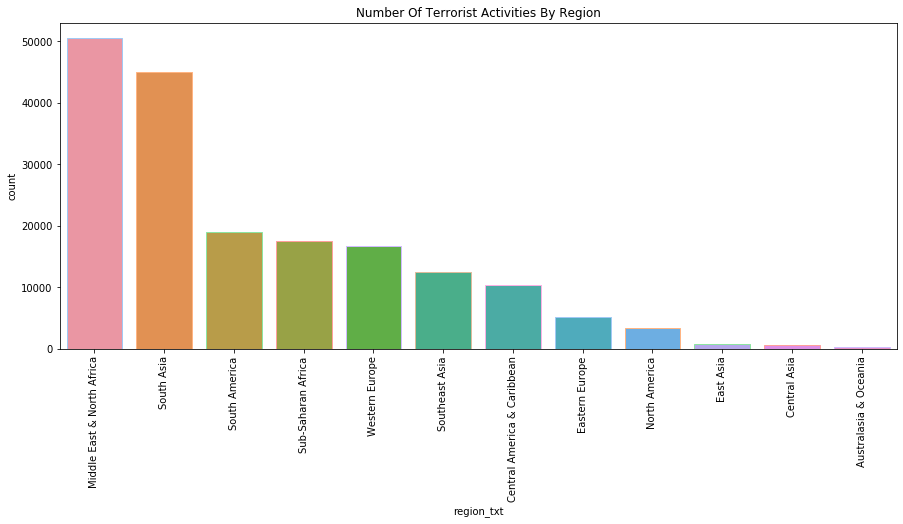

In [24]:
plt.subplots(figsize=(15,6))
sns.countplot('region_txt',data=df,edgecolor=sns.color_palette('pastel',7),order=df['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

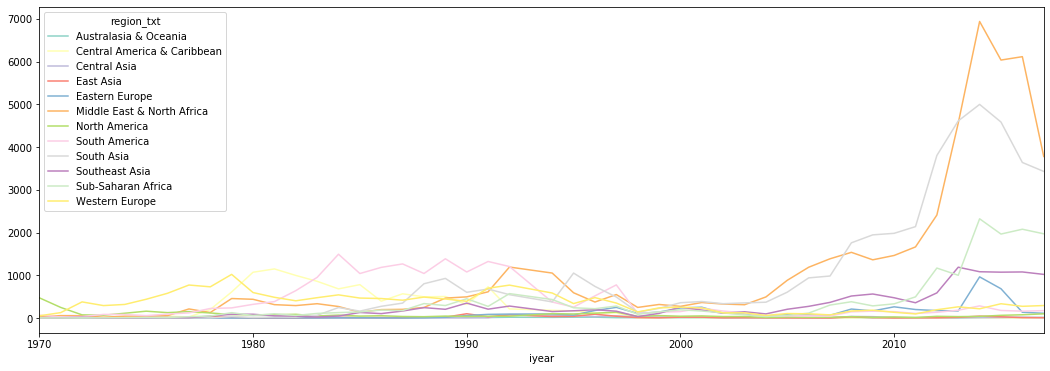

In [25]:
df_region_txt=pd.crosstab(df.iyear,df.region_txt)
df_region_txt.plot(color=sns.color_palette('Set3',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

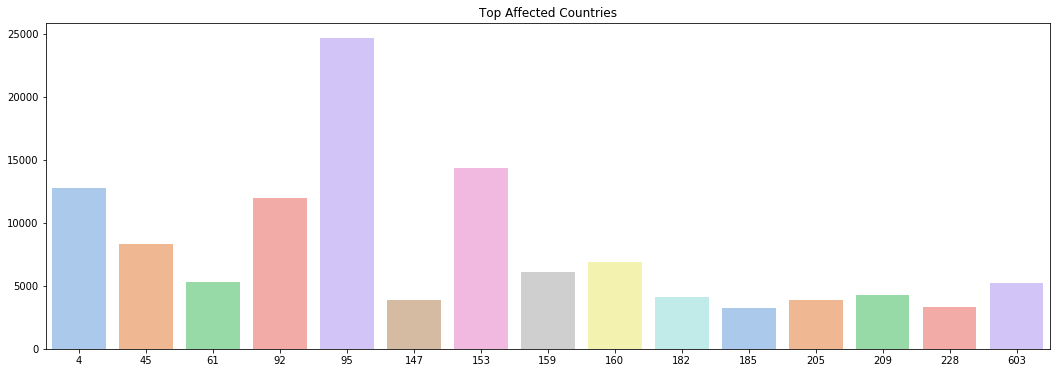

In [56]:
plt.subplots(figsize=(18,6))
sns.barplot(df['country'].value_counts()[:15].index,df['country_txt'].value_counts()[:15].values,palette='pastel')
plt.title('Top Affected Countries')
plt.show()

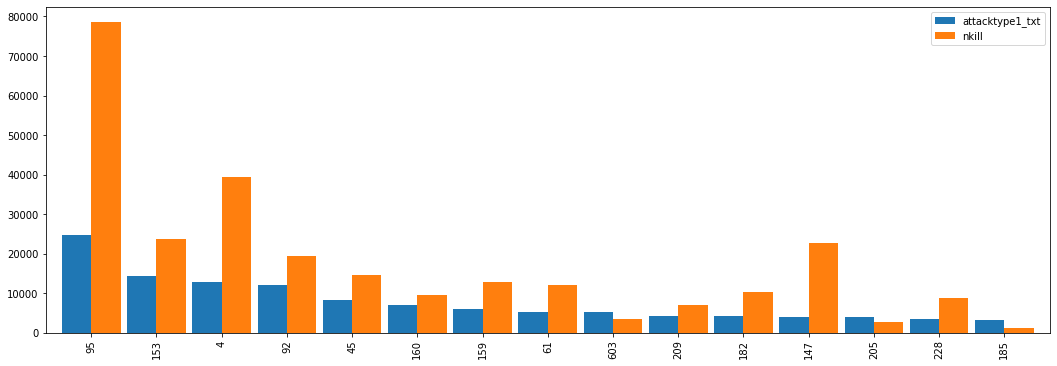

In [27]:
coun_df=df['country'].value_counts()[:15].to_frame()
coun_df.columns=['attacktype1_txt']
coun_kill=df.groupby('country')['nkill'].sum().to_frame()
coun_df.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dharanireddy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dharanireddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


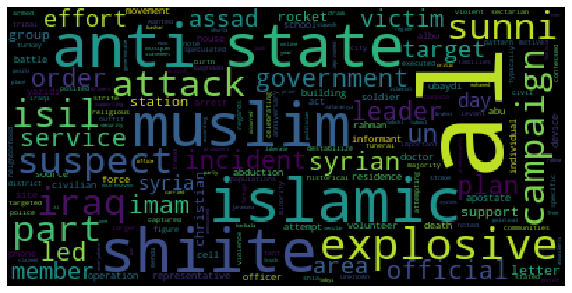

In [65]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
motive=df[df['gname'] == 'Islamic State of Iraq and the Levant (ISIL)']['motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axis('off')
plt.show()

## BAYESIAN INTERFERENCE

In [29]:
features = df[['iyear', 'imonth', 'iday', 'extended', 'approxdate', 'crit1', 'crit2', 'crit3', 'multiple', 
                    'country_txt', 'region_txt', 'latitude', 'longitude', 'attacktype1', 'attacktype1_txt', 
                    'attacktype2_txt', 'attacktype2', 'attacktype3', 'region', 'weaptype1', 'country',
                    'attacktype3_txt', 'success', 'suicide', 'weaptype1_txt', 'weapsubtype1_txt', 
                    'weapsubtype2_txt', 'weapsubtype3_txt', 'weapsubtype4_txt', 'targtype1_txt', 
                    'corp1', 'natlty1_txt', 'gname', 'gsubname', 'gsubname2', 'gname2', 
                    'nperps', 'nperpcap', 'nkill', 'nkillter', 'nwound', 'property', 
                    'propvalue','nhostkidus', 'ndays', 'ransomamt' ,'longitude', 'latitude']]


In [30]:
                   
import pymc3 as pm

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [31]:
features['attacktype1'].value_counts()

3    88255
2    42669
1    19312
6    11158
7    10356
9     7276
8     1015
5      991
4      659
Name: attacktype1, dtype: int64

In [32]:
df_attacktype1 = features[(features['attacktype1'] == 3) & (features['country']==95)]

In [33]:
df_attacktype1_pre = df_attacktype1[(df_attacktype1.iyear < 2015)]
df_attacktype1_post = df_attacktype1[(df_attacktype1.iyear >= 2015)]

In [34]:
pre_iran = df_attacktype1_pre.iyear.groupby(df_attacktype1_pre['iyear']).value_counts()
post_iran = df_attacktype1_post.iyear.groupby(df_attacktype1_post['iyear']).value_counts()
print (pre_iran.head(10))
print (post_iran.head())

iyear  iyear
1976   1976      1
1980   1980      3
1982   1982      3
1983   1983      3
1984   1984      1
1988   1988      2
1989   1989      3
1991   1991      1
1992   1992     10
1994   1994     11
Name: iyear, dtype: int64
iyear  iyear
2015   2015     2200
2016   2016     2760
2017   2017     1866
Name: iyear, dtype: int64


In [35]:
mean_prior_mean = pre_iran.mean()
mean_prior_std = pre_iran.std()
print (mean_prior_mean)
print (mean_prior_std)

382.0
682.4333237608714


In [36]:
with pm.Model() as model:
# Means 
    pre_mean = pm.Normal('Pre_mean', mean_prior_mean, sd=mean_prior_std)
    post_mean = pm.Normal('Post_mean', mean_prior_mean, sd=mean_prior_std)

In [37]:

std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
# Standard Deviations     
    pre_iran_std = pm.Uniform('Pre_iraq_std', lower=std_prior_lower, upper=std_prior_upper)
    post_iran_std = pm.Uniform('Post_iraq_std', lower=std_prior_lower, upper=std_prior_upper)

In [38]:
import time

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Post_iran_std, Pre_iran_std, Post_mean, Pre_mean]
Sampling 2 chains: 100%|██████████| 13000/13000 [01:26<00:00, 102.99draws/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a349f3b00>,
      dtype=object)

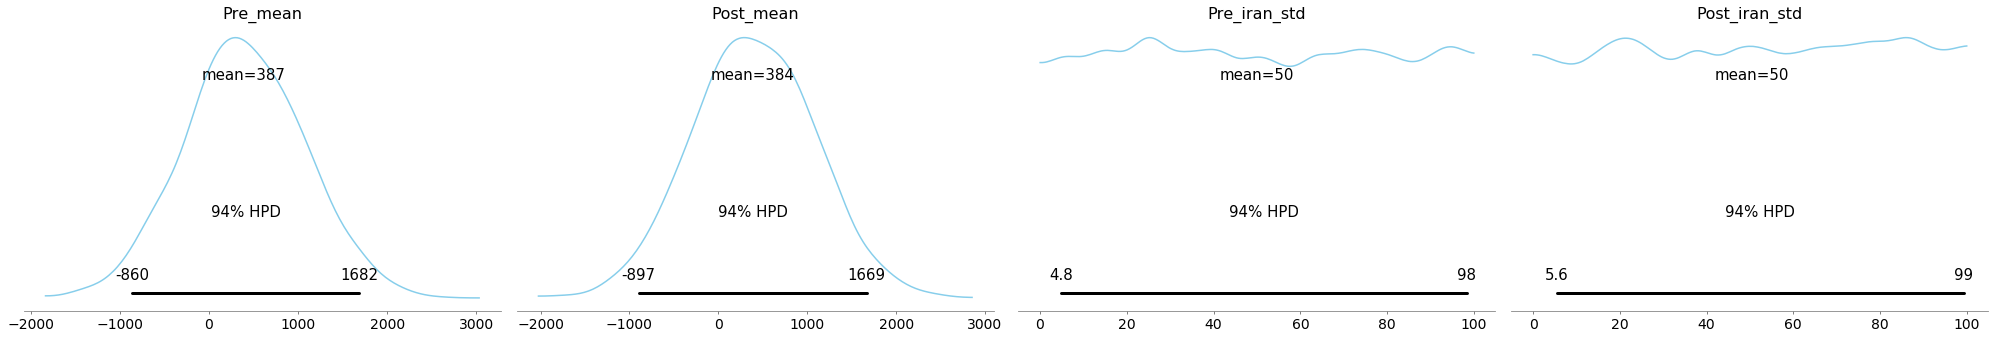

In [39]:
t0 = time.time()
with model:
    trace = pm.sample(6000)
t1 = time.time()
pm.plot_posterior(trace[2000:],
                  varnames=['Pre_mean', 'Post_mean', 'Pre_iraq_std', 'Post_iraq_std'],
                  color='#87ceeb')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3419f4e0>,
      dtype=object)

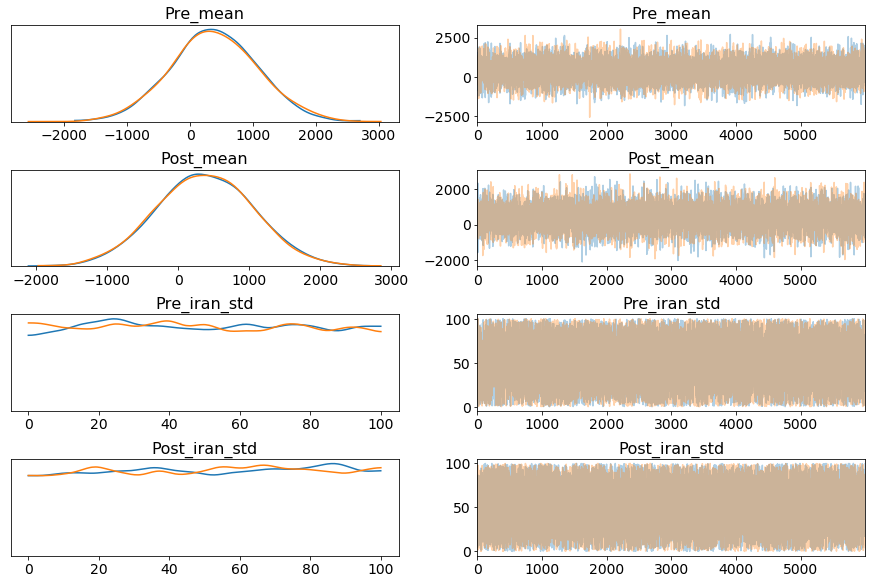

In [40]:
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3531f5f8>,
      dtype=object)

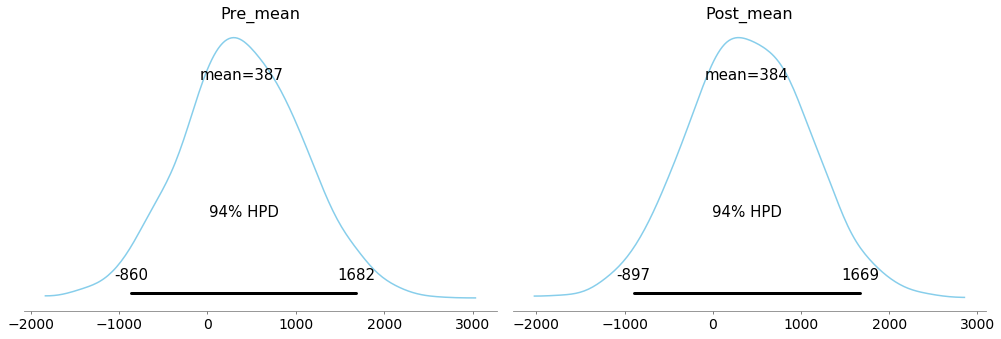

In [41]:

pm.plot_posterior(trace[2000:],
                  varnames=['Pre_mean', 'Post_mean'],
                  color='#87ceeb')

In [42]:
with model:
# Differences 
    diff_of_means = pm.Deterministic('difference of means', pre_mean - post_mean)
    diff_of_stds = pm.Deterministic('difference of stds', pre_iraq_std - post_iraq_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((pre_iraq_std**2 + post_iraq_std**2) / 2))

In [47]:
def succ_fail(df,country):
    s = df[df['country_txt']==country]
    s2 = pd.DataFrame(s.groupby(['iyear','success'])['iyear'].count())
    s2.columns=['count']
    s2.reset_index(inplace=True)
    s2["dummy"]=0
    color_set2 = ['#f71325','#20d813']
    p = sns.tsplot(time='iyear',value='count',condition='success',data=s2,unit='dummy',color = sns.color_palette(color_set2))
    p.set_title(country)
    p.set_ylabel("Number of Attacks")
    p.set_xlabel("Year")
    plt.show()

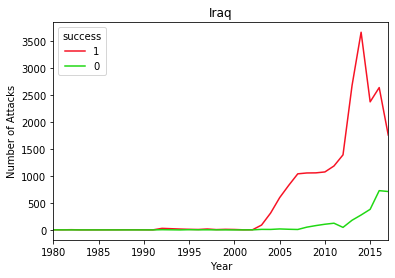

In [48]:
plot_countries =['Iraq']
for i in plot_countries:
    succ_fail(df,i)

In [49]:
num_cols = ['eventid','iyear','imonth','iday','extended','country','region','latitude','longitude','specificity','vicinity','crit1','crit2','crit3','doubtterr','alternative','multiple','success','suicide','attacktype1','attacktype2','attacktype3','targtype1','targsubtype1','natlty1','targtype2','targsubtype2','natlty2','targtype3','targsubtype3','guncertain1','guncertain2','guncertain3','individual','nperps','nperpcap','claimed','claimmode','claim2','claimmode2','claimmode2_txt','claim3','claimmode3','compclaim','weaptype1','weapsubtype1','weaptype2','weapsubtype2','weaptype3','weapsubtype3','weaptype4','weapsubtype4','nkill','nkillus','nkillter','nwound','nwoundus','nwoundte','property','propextent','propvalue','ishostkid','nhostkid','nhostkidus','nhours','ndays','ransom','ransomamt','ransomamtus','ransompaid','hostkidoutcome','nreleased','INT_LOG','INT_IDEO','INT_MISC','INT_ANY']

In [50]:
x=df[num_cols]

In [51]:
y = x['success']

In [52]:
x= x.fillna(0)

In [53]:
X = x.drop(['success','claimmode2_txt'],axis=1)

In [54]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

Size of training set: 102201   size of validation set: 34067   size of test set: 45423



[5.75965723e-02 4.51280073e-02 3.82268527e-02 4.11847812e-02
 3.24807379e-03 2.72150247e-02 2.28290861e-02 4.43719459e-02
 4.56834450e-02 1.46486796e-02 6.69060938e-03 8.94981812e-04
 6.84228089e-04 4.44632700e-03 8.40585468e-03 3.65859214e-03
 9.32405547e-03 4.00430308e-03 5.49220482e-02 2.09754503e-03
 8.07961939e-05 6.26364076e-02 6.50480048e-02 2.54290801e-02
 4.62729662e-03 3.52255275e-03 3.36301603e-03 3.66579986e-04
 3.25775091e-04 5.02069452e-03 3.38114907e-04 8.33209448e-05
 7.21757914e-04 2.16814338e-02 9.71079510e-03 4.72490706e-03
 6.05666495e-03 2.52671668e-04 2.11986823e-04 1.70276896e-04
 8.43532529e-05 1.61008161e-03 1.80710058e-02 4.20237063e-02
 4.98058272e-03 4.08711740e-03 7.53062016e-04 6.19301879e-04
 7.60321407e-05 6.42447876e-05 6.23796989e-02 5.01319341e-04
 1.44224591e-02 4.71645708e-02 5.28471982e-04 5.38248629e-03
 6.82292629e-02 4.05505884e-02 4.16016388e-03 2.73049336e-03
 1.20562696e-03 1.48572961e-04 8.95185238e-04 2.87115144e-04
 6.52757541e-04 1.218643

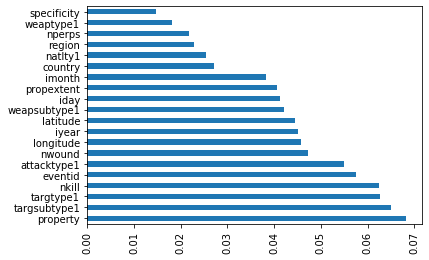

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.xticks(rotation=90)
plt.show()

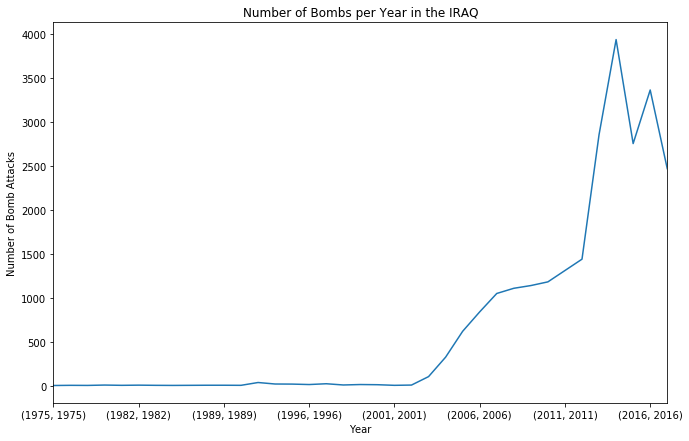

In [72]:
from matplotlib import pylab
features_indo = features[features.country == 95]
features_indo.groupby('iyear').iyear.value_counts().plot(kind='line')
plt.title('Number of Bombs per Year in the IRAQ')
plt.xlabel('Year')
plt.ylabel('Number of Bomb Attacks')
pylab.rcParams['figure.figsize'] = (20, 22)


In [73]:
features_b = features[features['attacktype1']==3]
features_b.head()

,iyear,imonth,iday,extended,approxdate,crit1,crit2,crit3,multiple,country_txt,...,nkill,nkillter,nwound,property,propvalue,nhostkidus,ndays,ransomamt,longitude,latitude
3,1970,1,0,0,NaN,1,1,1,0.0,Greece,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,23.762728,37.997490
7,1970,1,2,0,NaN,1,1,1,0.0,United States,...,0.0,0.0,0.0,1,22500.0,NaN,NaN,NaN,-122.225906,37.791927
10,1970,1,1,0,NaN,1,1,0,0.0,United States,...,0.0,NaN,0.0,0,0.0,NaN,NaN,NaN,-89.744299,43.468500
15,1970,1,10,0,NaN,1,1,1,0.0,East Germany (GDR),...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,13.401851,52.501530
17,1970,1,12,0,NaN,1,1,1,0.0,United States,...,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,-73.931351,40.697132


In [74]:
from statsmodels.tsa.stattools import adfuller

In [78]:
def test_stationarity(timeseries, window):

    #Determing rolling statistics
    # rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(window=window).mean()
    # rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=window).std()
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    return rolmean

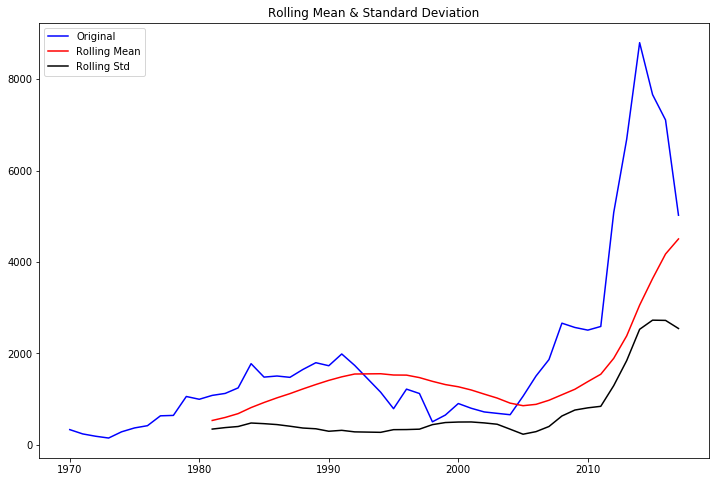

Results of Dickey-Fuller Test
Test Statistic                 -1.040153
p-value                         0.738339
#Lags Used                      7.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


1970            NaN
1971            NaN
1972            NaN
1973            NaN
1974            NaN
1975            NaN
1976            NaN
1977            NaN
1978            NaN
1979            NaN
1980            NaN
1981     533.250000
1982     599.250000
1983     683.166667
1984     815.500000
1985     926.583333
1986    1028.333333
1987    1120.583333
1988    1223.083333
1989    1319.916667
1990    1410.500000
1991    1488.000000
1992    1549.750000
1994    1555.666667
1995    1527.833333
1996    1525.583333
1997    1471.166667
1998    1389.666667
1999    1318.500000
2000    1270.750000
2001    1200.000000
2002    1110.250000
2003    1023.416667
2004     912.666667
2005     856.500000
2006     885.916667
2007     975.500000
2008    1095.750000
2009    1216.166667
2010    1383.333333
2011    1544.833333
2012    1893.083333
2013    2383.500000
2014    3056.750000
2015    3637.833333
2016    4175.250000
2017    4505.250000
Name: iyear, dtype: float64

In [79]:
test_stationarity(features_b.iyear.value_counts().sort_index(), 12)